In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, Dropdown

In [20]:
# Load data
HD_data = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
HD_data = HD_data.astype(int)
HD_data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,0,1,1,1,18,0,0,2,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [21]:
# Check for missing values
print(HD_data.isnull().sum())

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [22]:
# Correctly create 'Diabetes_Combined' before using it
HD_data['Diabetes'] = np.where(HD_data['Diabetes'].isin([1, 2]), 1, 0)



# Combine columns with correct referencing
HD_data['Combined'] = HD_data['Stroke'].astype(str) + '_' + HD_data['HeartDiseaseorAttack'].astype(str) + '_' + HD_data['Diabetes'].astype(str)

# Viewing the tail of DataFrame
print(HD_data.tail())

# Printing column names
print(HD_data.columns)

# Map numerical columns to categorical labels
categorical_mappings = {
    'HighBP': {0: 'No', 1: 'Yes'},
    'HighChol': {0: 'No', 1: 'Yes'},
    'CholCheck': {0: 'No', 1: 'Yes'},
    'Smoker': {0: 'No', 1: 'Yes'},
    'PhysActivity': {0: 'No', 1: 'Yes'},
    'Fruits': {0: 'No', 1: 'Yes'},
    'Veggies': {0: 'No', 1: 'Yes'},
    'HvyAlcoholConsump': {0: 'No', 1: 'Yes'},
    'AnyHealthcare': {0: 'No', 1: 'Yes'},
    'NoDocbcCost': {0: 'No', 1: 'Yes'},
    'DiffWalk': {0: 'No', 1: 'Yes'},
    'Sex': {0: 'Male', 1: 'Female'}
}

# Create contingency tables
def create_contingency_table(df, category):
    contingency_table = df.groupby('Combined')[category].value_counts().unstack().fillna(0)
    total = contingency_table.sum(axis=1)
    percentages = (contingency_table.div(total, axis=0) * 100).add_prefix(f"{category}_percentage_")
    percentages = percentages.round(2)
    percentages = percentages.astype(str) + "%"
    return pd.concat([contingency_table, percentages, total.rename('Total')], axis=1)

# Generate all contingency tables
categories = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
              'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
tables = {cat: create_contingency_table(HD_data, cat) for cat in categories}

        HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  \
253675                     0       1         1          1   45       0   
253676                     0       1         1          1   18       0   
253677                     0       0         0          1   28       0   
253678                     0       1         0          1   23       0   
253679                     1       1         1          1   25       0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  NoDocbcCost  GenHlth  \
253675       0         0             0       1  ...            0        3   
253676       0         1             0       0  ...            0        4   
253677       0         0             1       1  ...            0        1   
253678       0         0             0       1  ...            0        3   
253679       0         1             1       1  ...            0        2   

        MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  Combined  
253675        

In [23]:
# Dropdown for selecting the variable to compare against 'Combined'
compare_dropdown = widgets.Dropdown(
    options=list(categorical_mappings.keys()),
    description='Compare With:'
)

def update_plot(compare_with):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=HD_data, x='Combined', hue=compare_with, palette='viridis')
    plt.title(f"Distribution of Disease Combinations by {compare_with}")
    plt.xlabel("Disease Combination")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Display interactive controls
widgets.interactive(update_plot, compare_with=compare_dropdown)

interactive(children=(Dropdown(description='Compare With:', options=('HighBP', 'HighChol', 'CholCheck', 'Smoke…

In [24]:
HD_data_filter = HD_data[HD_data["Combined"] != "0_0_0"]

In [25]:
# Age division -> 3 groups = 18 - 35: Young Adult -> 36 - 65: Adult -> 65+ Senior
# Create dropdown widget

import pandas as pd
import numpy as np
import ipywidgets as widgets  # Import widgets module from ipywidgets
from IPython.display import display

# Now you can proceed with defining your dropdown widget and other interactive elements

category_dropdown = widgets.Dropdown(
    options=['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
             'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'],
    description='Select Variable:',
    disabled=False
)

# Define function to update output
def update_output(category):
    table = create_contingency_table(HD_data, category)
    display(table)

# Create an interactive widget and display the dropdown
widgets.interactive(update_output, category=category_dropdown)

interactive(children=(Dropdown(description='Select Variable:', options=('HighBP', 'HighChol', 'CholCheck', 'Sm…

In [69]:
print(max(HD_data["BMI"]))
print(min(HD_data["BMI"]))
'''
According to CHATGPT:

Underweight: BMI less than 18.5
Normal weight: BMI 18.5 to 24.9
Overweight: BMI 25 to 29.9
Obesity: BMI 30 to 40
Severe obesity: BMI over 40
'''

#HD_data["BMI"]

#import pandas as pd


# Define the bins and labels for BMI categories
bins = [0, 19, 25, 30, 40, float('inf')]  # BMI category boundaries
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity', 'Severe obesity']  # BMI category labels

# Divide BMI values into categories
HD_data['BMI_category'] = pd.cut(HD_data['BMI'], bins=bins, labels=labels, right=False)

print(HD_data)

98
12
        HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  \
0                          0       1         1          1   40       1   
1                          0       0         0          0   25       1   
2                          0       1         1          1   28       0   
3                          0       1         0          1   27       0   
4                          0       1         1          1   24       0   
...                      ...     ...       ...        ...  ...     ...   
253675                     0       1         1          1   45       0   
253676                     0       1         1          1   18       0   
253677                     0       0         0          1   28       0   
253678                     0       1         0          1   23       0   
253679                     1       1         1          1   25       0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  DiffWalk  Sex  Age  \
0            0         0      

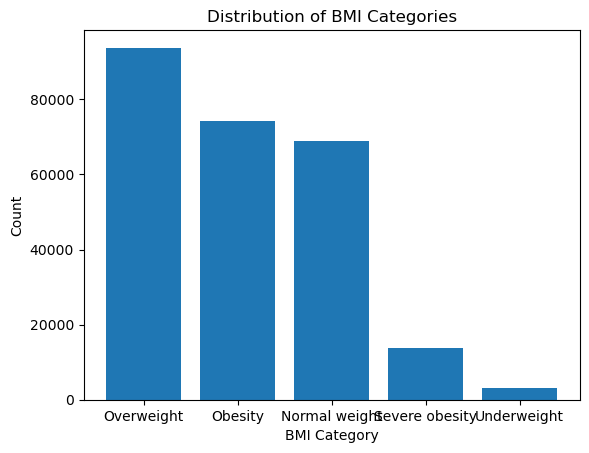

In [71]:
import matplotlib.pyplot as plt
category_counts = HD_data["BMI_category"].value_counts()

# Plot the distribution of BMI categories
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.title('Distribution of BMI Categories')
plt.show()

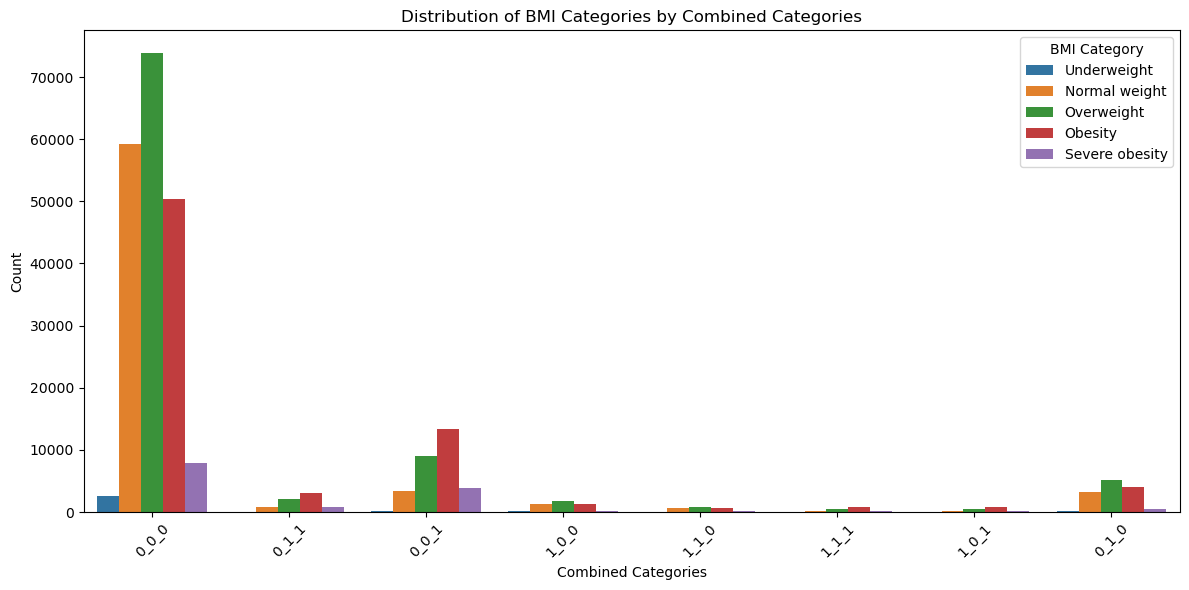

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='Combined', hue='BMI_category', data=HD_data)
plt.xlabel('Combined Categories')
plt.ylabel('Count')
plt.title('Distribution of BMI Categories by Combined Categories')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='BMI Category')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [29]:
#print(max(HD_data["MentHlth"]))
#print(min(HD_data["MentHlth"]))


"""
Will divide into 3 groups
Low Mental Health: 0 - 10 
Mid Mental Health: 11 - 20
High Mental Health: 21 - 30 
"""

bins = [0, 10, 20, float('inf')]  
labels = ['Low Mental Health', 'Mid Mental Health', 'High Mental Health']  


HD_data['MentHlth_category'] = pd.cut(HD_data['MentHlth'], bins=bins, labels=labels, right=False)

print(HD_data['MentHlth_category'])

0          Mid Mental Health
1          Low Mental Health
2         High Mental Health
3          Low Mental Health
4          Low Mental Health
                 ...        
253675     Low Mental Health
253676     Low Mental Health
253677     Low Mental Health
253678     Low Mental Health
253679     Low Mental Health
Name: MentHlth_category, Length: 253680, dtype: category
Categories (3, object): ['Low Mental Health' < 'Mid Mental Health' < 'High Mental Health']


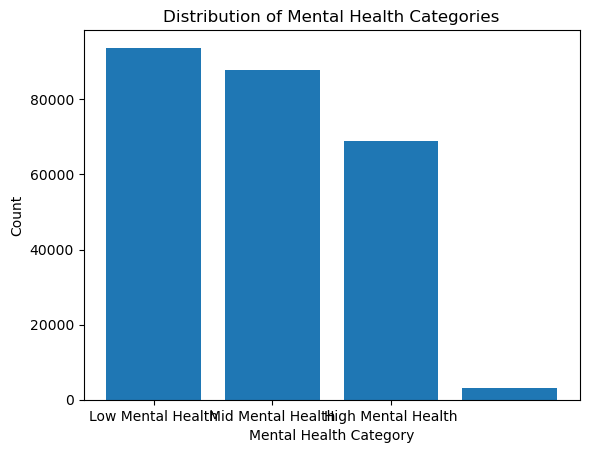

In [30]:
plt.bar(range(len(category_counts)), category_counts.values)
plt.xlabel('Mental Health Category')
plt.ylabel('Count')
plt.title('Distribution of Mental Health Categories')

plt.xticks(range(len(labels)), labels)

plt.show()

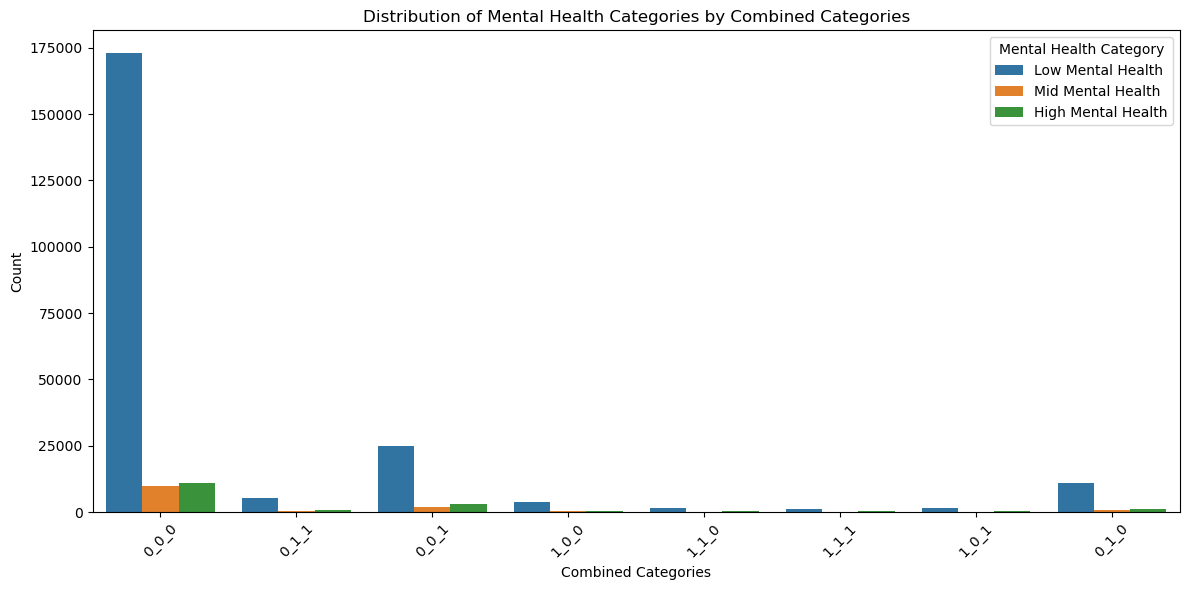

In [31]:
plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='Combined', hue='MentHlth_category', data=HD_data)
plt.xlabel('Combined Categories')
plt.ylabel('Count')
plt.title('Distribution of Mental Health Categories by Combined Categories')
plt.xticks(rotation=45) 
plt.legend(title='Mental Health Category')
plt.tight_layout() 
plt.show()

In [32]:
print(max(HD_data["Age"]))
print(min(HD_data["Age"]))

'''
Age division -> 3 groups 
Young Adult: 18 - 35 : 1 - 5
Adult -> 36 - 65 5 - 9
Elder -> 65+ Senior 9 - 13

'''

bins = [1, 5, 9, float('inf')]  
labels = ['Young Adult', 'Adult', 'Elder']  


HD_data['Age_category'] = pd.cut(HD_data['Age'], bins=bins, labels=labels, right=False)

print(HD_data['Age_category'])

13
1
0               Elder
1               Adult
2               Elder
3               Elder
4               Elder
             ...     
253675          Adult
253676          Elder
253677    Young Adult
253678          Adult
253679          Elder
Name: Age_category, Length: 253680, dtype: category
Categories (3, object): ['Young Adult' < 'Adult' < 'Elder']


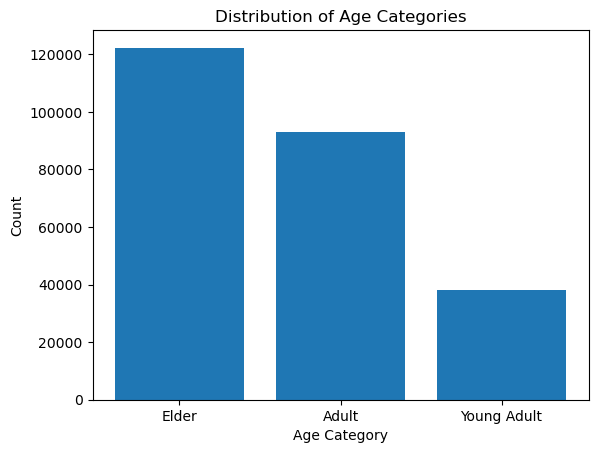

In [75]:
category_counts = HD_data["Age_category"].value_counts()

# Plot the distribution of Age categories
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Age Categories')
plt.show()

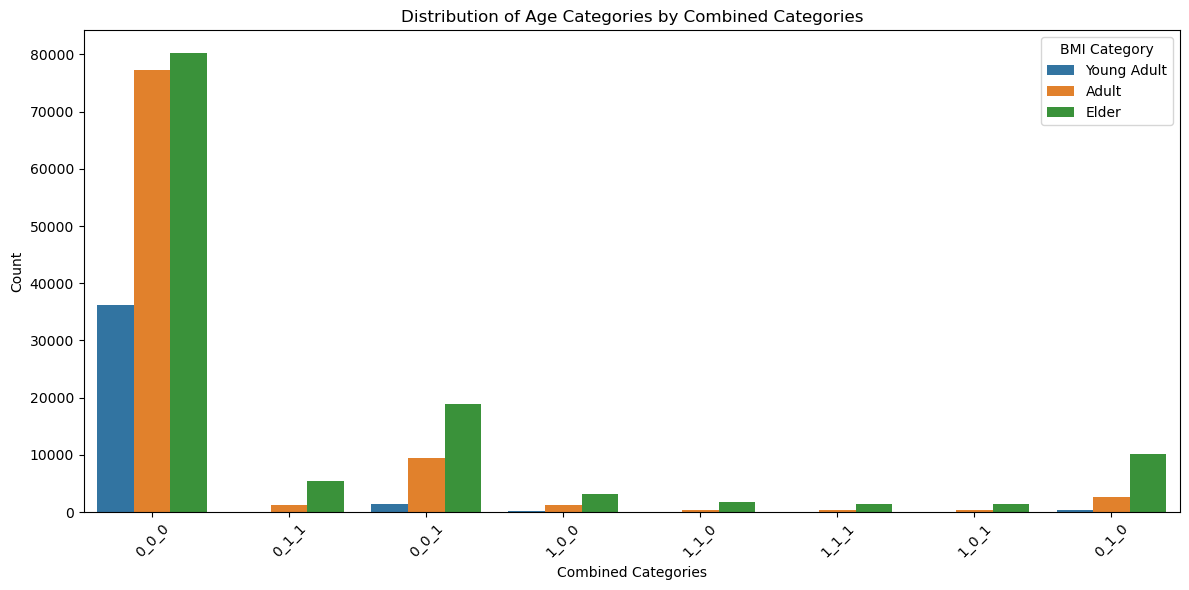

In [77]:
plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='Combined', hue='Age_category', data=HD_data)
plt.xlabel('Combined Categories')
plt.ylabel('Count')
plt.title('Distribution of Age Categories by Combined Categories')
plt.xticks(rotation=45) 
plt.legend(title='Age
Category')
plt.tight_layout() 
plt.show()

In [35]:
max(HD_data["Income"])
#min(HD_data["Income"])


"""
Divide into 3 groups

Low Income: 1 - 3
Mid Income: 4 - 6
High Income: 7 - 8 

"""


bins = [1, 3, 6, float('inf')]  
labels = ['Low Income', 'Mid Income', 'High Income']  


HD_data['Income_category'] = pd.cut(HD_data['Income'], bins=bins, labels=labels, right=False)

print(HD_data['Income_category'])

0          Mid Income
1          Low Income
2         High Income
3         High Income
4          Mid Income
             ...     
253675    High Income
253676     Mid Income
253677     Low Income
253678     Low Income
253679     Low Income
Name: Income_category, Length: 253680, dtype: category
Categories (3, object): ['Low Income' < 'Mid Income' < 'High Income']


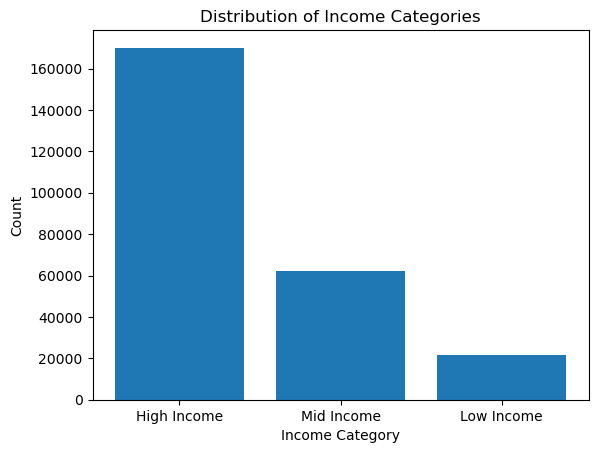

In [36]:
# Maybe redo this group!

category_counts = HD_data["Income_category"].value_counts()


'''
plt.bar(range(len(category_counts)), category_counts.values)
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Distribution of Income Categories')

plt.xticks(range(len(labels)), labels)

plt.show()

'''

#category_counts = HD_data["Age_category"].value_counts()

# Plot the distribution of BMI categories
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Distribution of Income Categories')
plt.show()

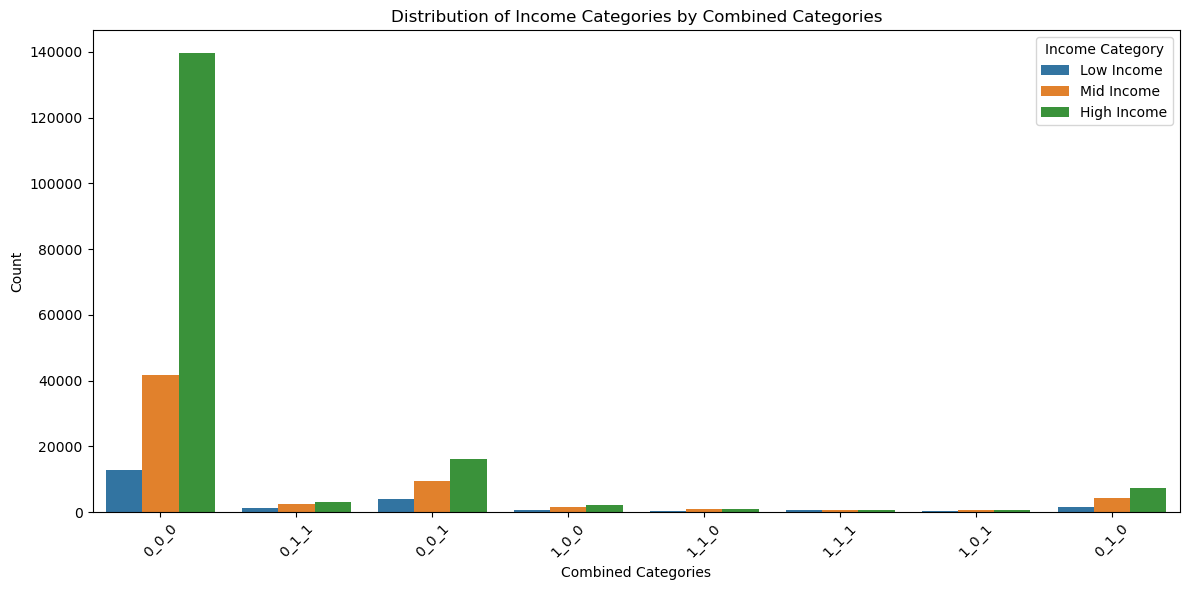

In [37]:
# This iS VERY INTERESTING!! Mostly all of the high income have nothing wrong with them>>>>>>!

plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='Combined', hue='Income_category', data=HD_data)
plt.xlabel('Combined Categories')
plt.ylabel('Count')
plt.title('Distribution of Income Categories by Combined Categories')
plt.xticks(rotation=45) 
plt.legend(title='Income Category')
plt.tight_layout() 
plt.show()

In [38]:
HD_data_filter = HD_data[HD_data["Combined"] != "0_0_0"]

In [67]:
# Define a function that creates the plot based on the selected variable
def plot_data(column):
    plt.figure(figsize=(10, 6))  # Set the size of the figure
    sns.countplot(x='Combined', hue=column, data=HD_data, palette='viridis')
    plt.title(f'Distribution of {column} by Combined Categories')
    plt.xlabel('Combined Category')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.legend(title=column, loc='upper right')
    plt.show()

# Create a dropdown and link it to the plot function
columns_to_plot = [col for col in HD_data.columns if col != 'Combined']
dropdown = Dropdown(options=columns_to_plot, description='Select Variable:')
interact(plot_data, column=dropdown)
##########################This is after the taking out the 0_0_0, 
# Define a function that creates the plot based on the selected variable
def plot_data(column):
    plt.figure(figsize=(10, 6))  # Set the size of the figure
    sns.countplot(x='Combined', hue=column, data=HD_data_filter, palette='viridis')
    plt.title(f'Distribution of {column} by Combined Categories')
    plt.xlabel('Combined Category')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.legend(title=column, loc='upper right')
    plt.show()

# Create a dropdown and link it to the plot function
columns_to_plot = [col for col in HD_data_filter.columns if col != 'Combined']
dropdown = Dropdown(options=columns_to_plot, description='Select Variable:')
interact(plot_data, column=dropdown)

interactive(children=(Dropdown(description='Select Variable:', options=('HeartDiseaseorAttack', 'HighBP', 'Hig…

interactive(children=(Dropdown(description='Select Variable:', options=('HeartDiseaseorAttack', 'HighBP', 'Hig…

<function __main__.plot_data(column)>